In [ ]:
import numpy as np

In [ ]:
def trend(time, slope=0):
    return slope * time

In [ ]:
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4,
            np.cos(season_time * 2 * np.pi),
            1 / np.exp(3 * season_time))

In [ ]:
def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

In [ ]:
def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [ ]:
time = np.arange(4*365+1,dtype="float32")

In [ ]:
baseline = 10
series = trend(time, .05)
amplitude = 15
slope=0.09
noise_level = 6

In [ ]:
series = baseline+trend(time,slope)+seasonality(time,period=365,
                                                amplitude=amplitude)
series +=noise(time, noise_level, seed = 42)

In [ ]:
import matplotlib.pyplot as plt
def plot_series(time, series, format ="-", start=0, end=None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)

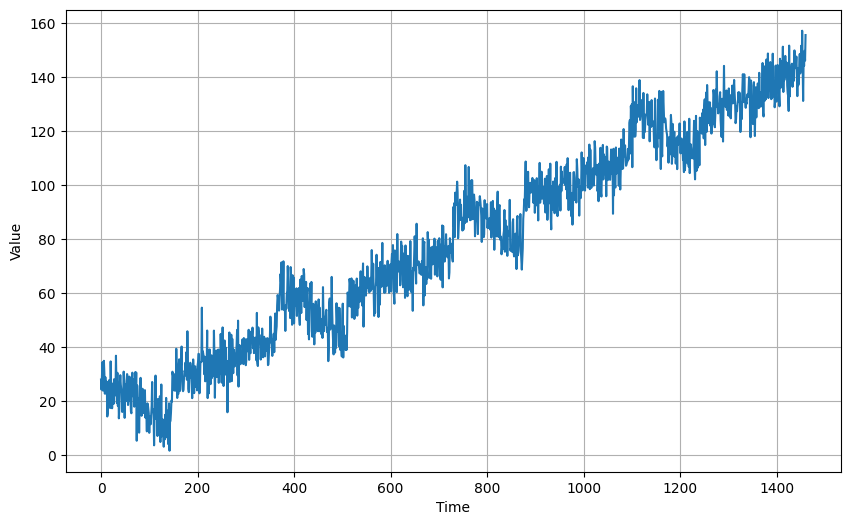

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

In [ ]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

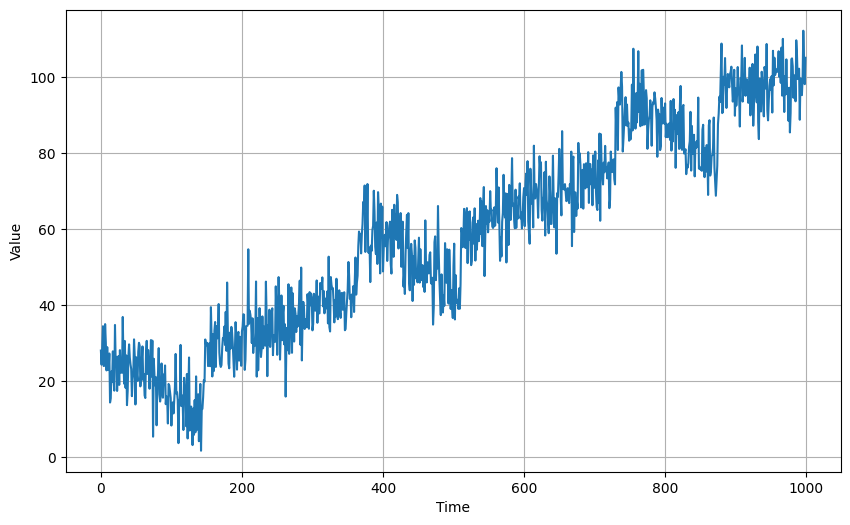

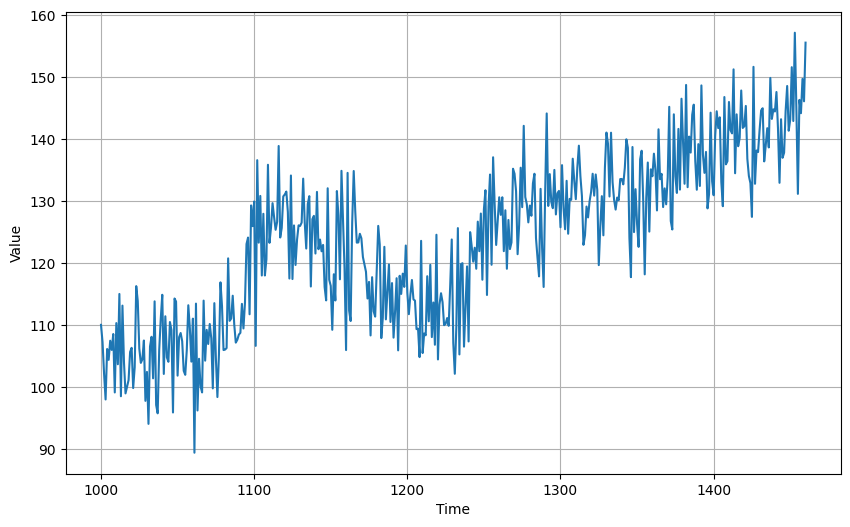

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time_train,x_train)
plt.show()

plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)
plt.show()

In [ ]:
naive_forecast=series[split_time-1:-1]

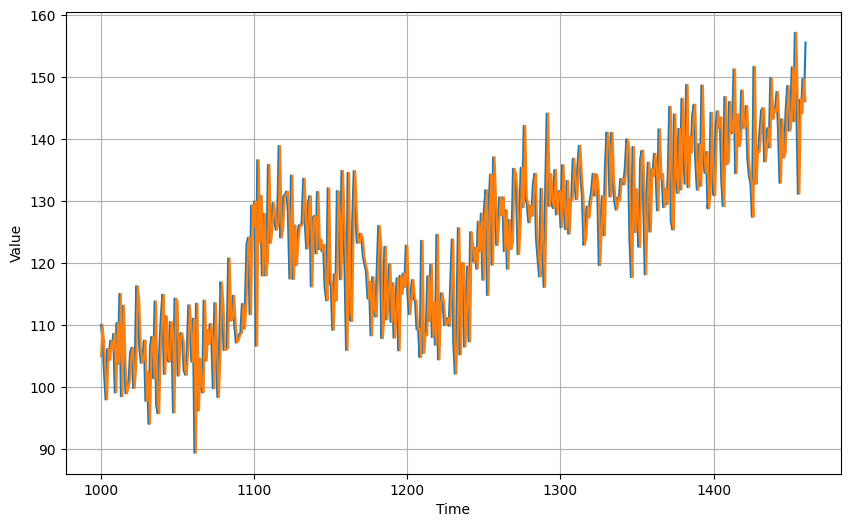

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)
plot_series(time_valid,naive_forecast)
plt.show()

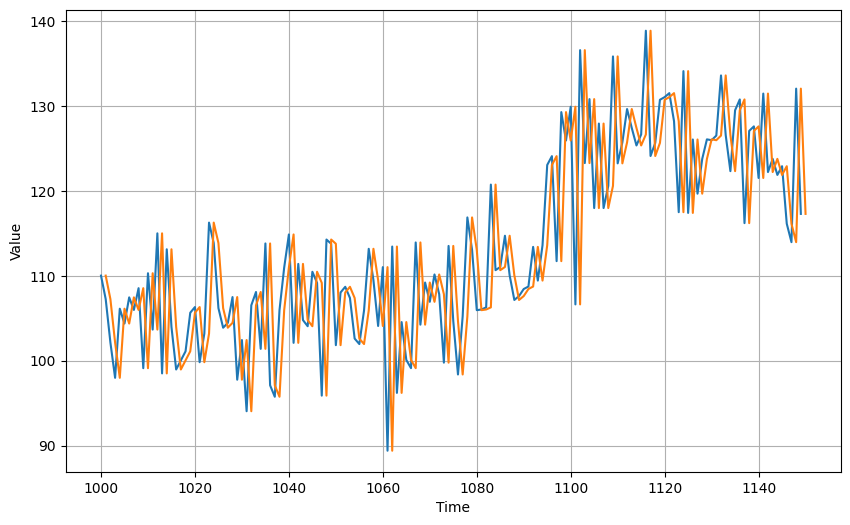

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid, start=0,end=150)
plot_series(time_valid,naive_forecast, start=1,end=151)
plt.show()

In [ ]:
import tensorflow as tf
print(tf.keras.metrics.mean_squared_error(x_valid,naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid,naive_forecast).numpy())

76.47491
6.899298


In [ ]:
def moving_average_forecast(series, window_size):
  forecast = []
  for time in range(len(series)-window_size):
    forecast.append(series[time:time+window_size].mean())
  return np.array(forecast)

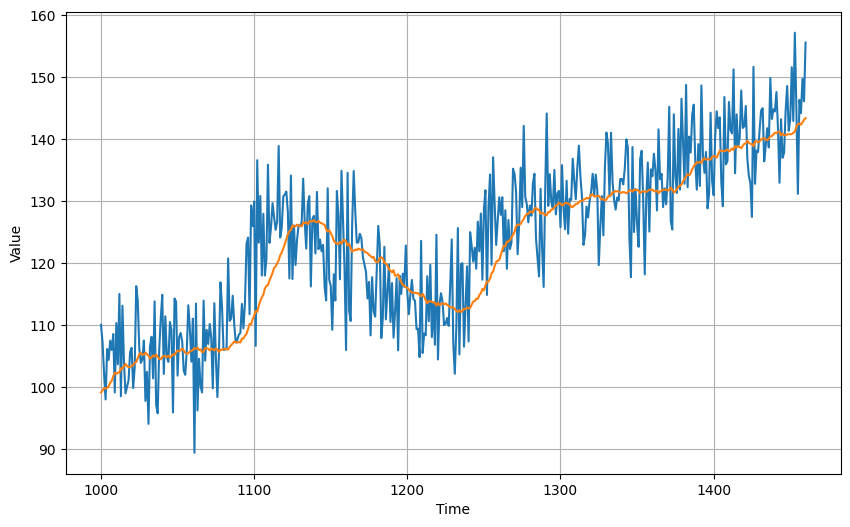

In [ ]:
moving_avg = moving_average_forecast(series, 30)[split_time-30:]

plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)
plot_series(time_valid, moving_avg)
plt.show()

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid,moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid,moving_avg).numpy())

49.044437
5.532835


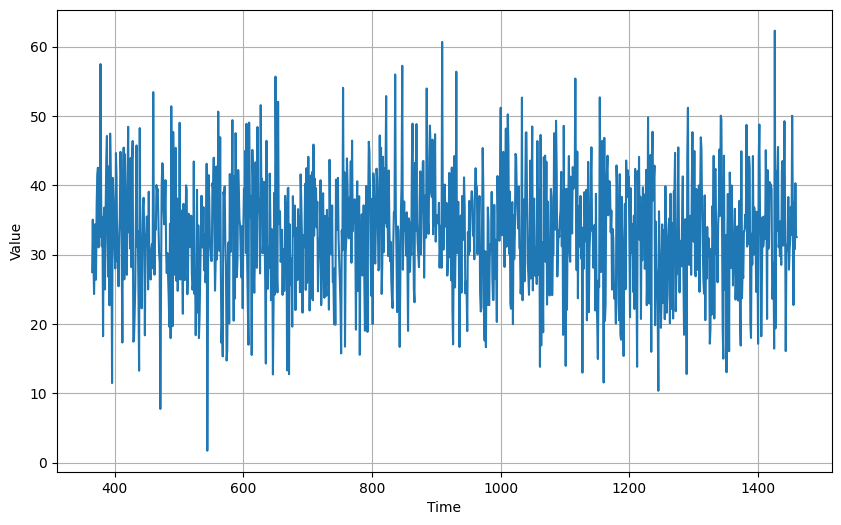

In [ ]:
diff_series=(series[365:]-series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10,6))
plot_series(diff_time, diff_series)
plt.show()

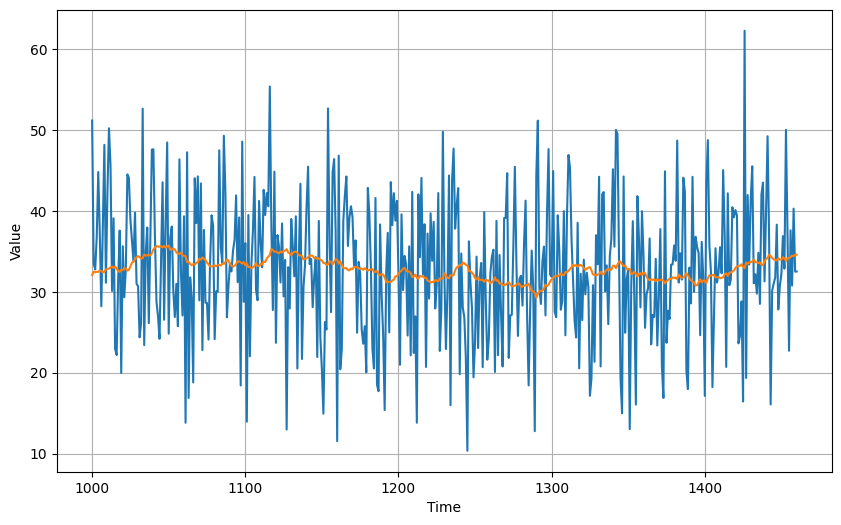

In [ ]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time-365-50:]

plt.figure(figsize=(10,6))
plot_series(time_valid,diff_series[split_time-365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

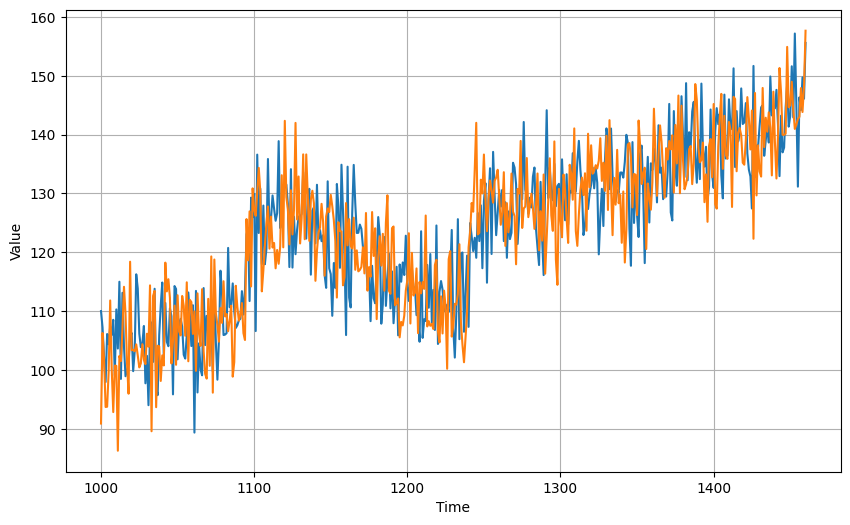

In [ ]:
diff_moving_avg_plus_past = series[split_time-365:-365]+diff_moving_avg

plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid,diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid,diff_moving_avg_plus_past).numpy())

76.282074
7.007173


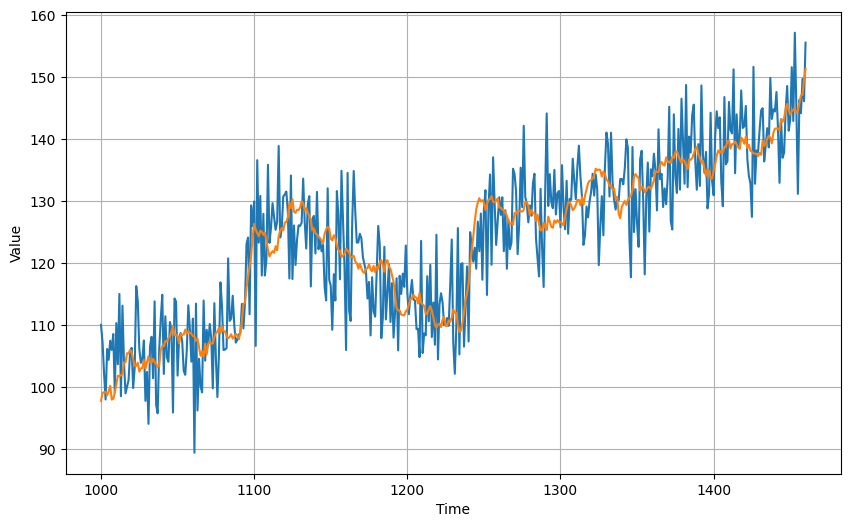

In [ ]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time-370:-360],10) +diff_moving_avg

plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid,diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid,diff_moving_avg_plus_smooth_past).numpy())

40.902336
5.1360006
